# ***Partea I - Construirea si explorarea unui dataset tabelar***

---



# **1. Tipul problemei**



Problema de clasificare

# **2. Crearea dataset-ului -> *Sintetic***

(array([ 14.,  59., 132., 211., 255., 159., 107.,  48.,  12.,   3.]),
 array([12. , 13.9, 15.8, 17.7, 19.6, 21.5, 23.4, 25.3, 27.2, 29.1, 31. ]),
 <BarContainer object of 10 artists>)

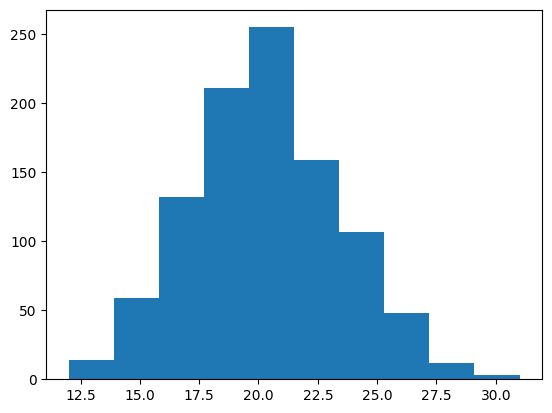

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#   Setarea unui seed imi va garanta ca la fiecare rulare, valorile "random"
# vor fi idenice.
#   Aleg acest lucru pentru a controla si pentru a vedea mai bine lucrurile gresite
# din output-uri.
#   Alegerea numarului x din np.random.seed(x) este irelevanta, asa ca am ales anul
# curent.
np.random.seed(2025)

# Numarul total de instate
# Antrenare (cel putin 500) => 700
# Testare (cel putin 200) => 300
n = 1000

# Generarea de coloane (Comportamentul unui client online)

# 1. Valoarea medie a unei comenzi
clopotGauss = np.random.normal(loc = 400, scale = 200, size = n)
valoare_comanda_medie = np.round(clopotGauss, 2)
# Evit sa am valori aberante (sa cheltuie valori negative)
valoare_comanda_medie = np.clip(valoare_comanda_medie, 10, 1000)

# 2. Foloseste aplicatia asociata magazinului?
aplicatia = np.random.choice(['da', 'nu'], size = n, p = [0.4, 0.6])

# 3. Tipul dispozitivului folosit
dispozitiv = np.random.choice(['mobil', 'tableta', 'desktop'], size = n, p = [0.5, 0.2, 0.3])

# 4. Timp petrecut pe site/aplicatie
#    -> minute
timp = np.random.randint(5, 60, size = n)

# 5. Frecventa lunara a comenzilor (Cat de des comanda)
frecventa_lunara = np.random.randint(0, 11, size = n)

# 6. Varsta client
varsta = np.random.randint(18, 60, size = n)

# 7. Metoda de plata
metoda_de_plata = np.random.choice(['ramburs', 'card'], size = n, p = [0.3, 0.7])

# 8. Foloseste cupoane de reducere?
cupoane_de_reducere = np.random.choice(['da', 'nu'], size = n, p = [0.6, 0.4])

# 9. Numar de recenzii scrise
recenzii = np.random.randint(0,11, size = n)

# Coloana tinta
# 10. Tipul de client
tip_client = []
scoruri = []
for i in range(n):
    scor = 0
    # 1.
    if valoare_comanda_medie[i] >= 800:
        scor += 5
    elif valoare_comanda_medie[i] >= 600:
        scor += 4
    elif valoare_comanda_medie[i] >= 400:
        scor += 3
    elif valoare_comanda_medie[i] >= 200:
        scor += 2
    else: 
        scor += 1

    # 2.
    if aplicatia[i] == 'da':
        scor += 2
    else:
        scor += 1

    # 3.
    if dispozitiv[i] == 'desktop':
        scor += 3
    elif dispozitiv[i] == 'tableta':
        scor += 2
    else: 
        scor += 1

    # 4.
    if timp[i] >= 50:
        scor += 5
    elif timp[i] >= 40:
        scor += 4
    elif timp[i] >= 30:
        scor += 3
    elif timp[i] >= 20:
        scor += 2
    else: 
        scor += 1

    # 5.
    if frecventa_lunara[i] >= 8:
        scor += 5
    elif frecventa_lunara[i] >= 6:
        scor += 4
    elif frecventa_lunara[i] >= 4:
        scor += 3
    elif frecventa_lunara[i] >= 2:
        scor += 2
    else: 
        scor += 1

    # 6.
    if varsta[i] >= 50:
        scor += 5
    elif varsta[i] >= 45:
        scor += 4
    elif varsta[i] >= 40:
        scor += 3
    elif varsta[i] >= 30:
        scor += 2
    else:
        scor += 1

    # 7.
    if metoda_de_plata[i] == 'card':
        scor += 2
    else: 
        scor += 1

    # 8.
    if cupoane_de_reducere[i] == 'nu':
        scor += 2
    else:
        scor += 1

    # 9.
    if recenzii[i] >= 9:
        scor += 5
    elif recenzii[i] >= 7:
        scor += 4
    elif recenzii[i] >= 5:
        scor += 3
    elif recenzii[i] >= 4:
        scor += 2
    else: 
        scor += 1
    scoruri.append(scor)

# MAX = 34
# Ultra vip, Vip, Moderate, Standard, low
# Calculăm pragurile la 20%, 40%, 60%, 80%
p20, p40, p60, p80 = np.percentile(scoruri, [20, 40, 60, 80])

tip_client = []
for s in scoruri:
    if s <= p20:
        tip_client.append("Low")
    elif s <= p40:
        tip_client.append("Standard")
    elif s <= p60:
        tip_client.append("Moderate")
    elif s <= p80:
        tip_client.append("Vip")
    else:
        tip_client.append("Ultra Vip")

data = {
    'valoare_comanda_medie': valoare_comanda_medie,
    'aplicatia': aplicatia,
    'dispozitiv': dispozitiv,
    'timp': timp,
    'frecventa_lunara': frecventa_lunara,
    'varsta': varsta,
    'metoda_de_plata': metoda_de_plata,
    'cupoane_de_reducere': cupoane_de_reducere,
    'recenzii': recenzii,
    'tip_client': tip_client
}
df = pd.DataFrame(data)

# Impart in subseturi

# Train (0.7), Test (0.3)
train, test = train_test_split(df, test_size = 0.3, random_state = 42)

# Salvez in fisiere csv
train.to_csv("train.csv", index = False)
test.to_csv("test.csv", index = False)
plt.hist(scoruri)


# **3. Analiza exploratie a datelor -> *EDA complex***

## **3. a) Analiza valorilor lipsa**

### **3. a) 1. train.csv**

In [66]:
import pandas as pd

# Încarc fișierul train.csv
df = pd.read_csv('train.csv')

# Numărul de valori lipsă de pe coloane
nr_valori_lipsa = df.isna().sum()

# Procentul de valori lipsă de pe coloane
procent_valori_lipsa = (nr_valori_lipsa / n) * 100

# Creez un tabel cu numarul si procentul de valori lipsa pe coloana
data = {
    'Valori lipsă': nr_valori_lipsa,
    'Procent': procent_valori_lipsa.round(2)
}

missing_data = pd.DataFrame(data)

# Afișez rezultatul
missing_data


,Valori lipsă,Procent
valoare_comanda_medie,0,0.0
aplicatia,0,0.0
dispozitiv,0,0.0
timp,0,0.0
frecventa_lunara,0,0.0
varsta,0,0.0
metoda_de_plata,0,0.0
cupoane_de_reducere,0,0.0
recenzii,0,0.0
tip_client,0,0.0


### **3. a) 2. test.csv**

In [67]:
import pandas as pd

# Încarc fișierul test.csv
df = pd.read_csv('test.csv')

# Numărul de valori lipsă de pe coloane
nr_valori_lipsa = df.isna().sum()

# Procentul de valori lipsă de pe coloane
procent_valori_lipsa = (nr_valori_lipsa / n) * 100

# Creez un tabel cu numarul si procentul de valori lipsa pe coloana
data = {
    'Valori lipsă': nr_valori_lipsa,
    'Procent': procent_valori_lipsa.round(2)
}

missing_data = pd.DataFrame(data)

# Afișez rezultatul
missing_data


,Valori lipsă,Procent
valoare_comanda_medie,0,0.0
aplicatia,0,0.0
dispozitiv,0,0.0
timp,0,0.0
frecventa_lunara,0,0.0
varsta,0,0.0
metoda_de_plata,0,0.0
cupoane_de_reducere,0,0.0
recenzii,0,0.0
tip_client,0,0.0


## **3. b) Statistici descriptive**

### **3. b) 1. train.csv**

In [68]:
import pandas as pd

# Încarc fișierul train.csv
df = pd.read_csv("train.csv")
# Interpretarea principalelor statistici pentru variabilele numerice si categorice
print(df.describe(include = "all"))

        valoare_comanda_medie aplicatia dispozitiv        timp  \
count              700.000000       700        700  700.000000   
unique                    NaN         2          3         NaN   
top                       NaN        nu      mobil         NaN   
freq                      NaN       427        351         NaN   
mean               392.538700       NaN        NaN   31.202857   
std                184.881365       NaN        NaN   15.824285   
min                 10.000000       NaN        NaN    5.000000   
25%                266.582500       NaN        NaN   18.000000   
50%                389.565000       NaN        NaN   31.000000   
75%                522.985000       NaN        NaN   44.250000   
max                983.050000       NaN        NaN   59.000000   

        frecventa_lunara      varsta metoda_de_plata cupoane_de_reducere  \
count         700.000000  700.000000             700                 700   
unique               NaN         NaN               2   

### **3. b) 2. test.csv**

In [69]:
import pandas as pd

# Încarc fișierul test.csv
df = pd.read_csv("test.csv")
# Interpretarea principalelor statistici pentru variabilele numerice si categorice
print(df.describe(include = "all"))

        valoare_comanda_medie aplicatia dispozitiv        timp  \
count              300.000000       300        300  300.000000   
unique                    NaN         2          3         NaN   
top                       NaN        nu      mobil         NaN   
freq                      NaN       180        140         NaN   
mean               402.286600       NaN        NaN   30.323333   
std                196.238597       NaN        NaN   15.509802   
min                 10.000000       NaN        NaN    5.000000   
25%                254.842500       NaN        NaN   17.000000   
50%                390.875000       NaN        NaN   30.000000   
75%                530.107500       NaN        NaN   43.250000   
max                919.660000       NaN        NaN   59.000000   

        frecventa_lunara      varsta metoda_de_plata cupoane_de_reducere  \
count         300.000000  300.000000             300                 300   
unique               NaN         NaN               2   

## **3. c) Analiza distributiei variabilelor**

### **3. c) 1. train.csv**

#### **3. c) 1.1 Valoarea medie a unei comenzi (valoare numerica)**

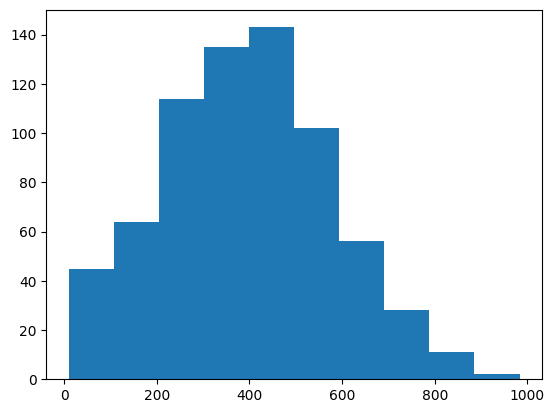

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("train.csv")
valoare_comanda_medie = df['valoare_comanda_medie']

# Afisez histograma pentru valoarea numerica "valoare_comanda_medie"
plt.hist(valoare_comanda_medie)
plt.show()

#### **3. c) 1.2 Foloseste aplicatia? (valoare categorica)**

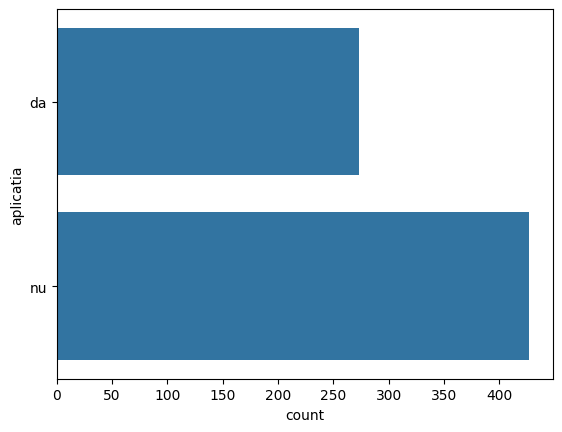

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("train.csv")
aplicatia = df['aplicatia']

# Afisez histograma pentru valoarea categorica "aplicatia"
# Tip Countplot
sns.countplot(aplicatia)
plt.show()


#### **3. c) 1.3 Ce dispozitiv foloseste? (valoare categorica)**

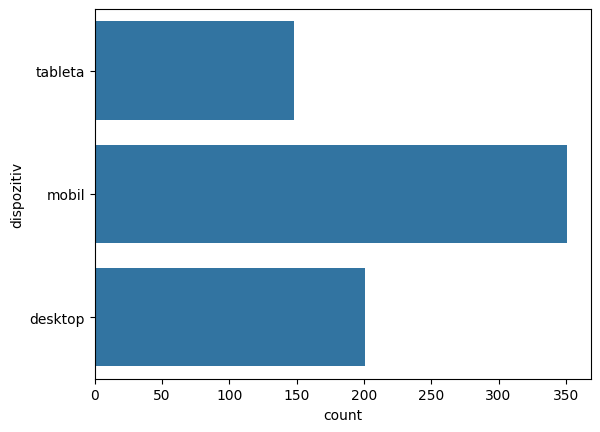

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("train.csv")
dispozitiv = df['dispozitiv']

# Afisez histograma pentru valoarea categorica "dispozitiv"
# Tip Countplot
sns.countplot(dispozitiv)
plt.show()

#### **3. c) 1.4 Cat timp petrece pe magazin? (valoare numerica)**

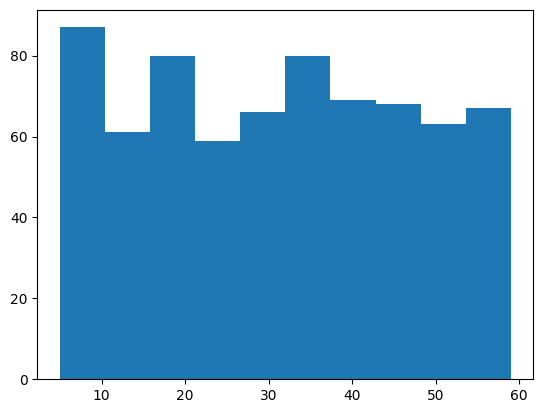

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("train.csv")
timp = df['timp']

# Afisez histograma pentru valoarea numerica "timp"
plt.hist(timp)
plt.show()

#### **3. c) 1.5 Frecventa lunara (valoare numerica)**

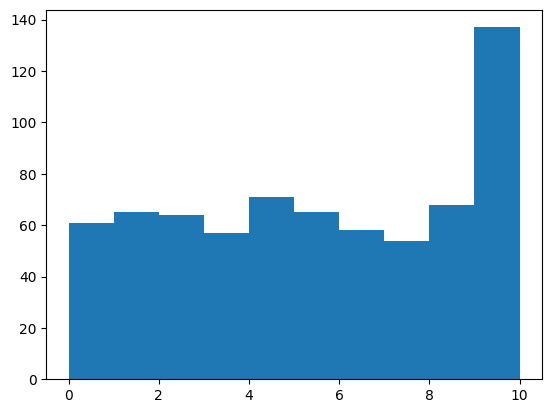

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("train.csv")
frecventa_lunara = df['frecventa_lunara']

# Afisez histograma pentru valoarea numerica "frecventa_lunara"
plt.hist(frecventa_lunara)
plt.show()

#### **3. c) 1.6 Varsta (valoare numerica)**

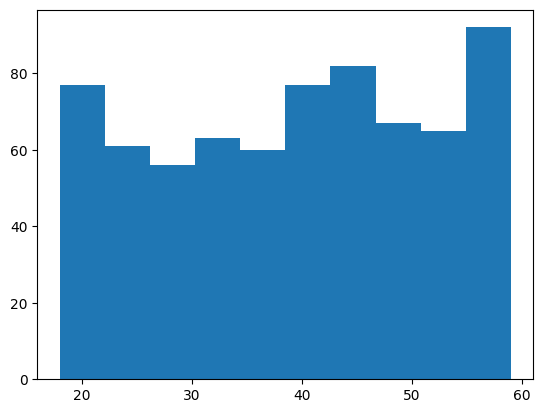

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("train.csv")
varsta = df['varsta']

# Afisez histograma pentru valoarea numerica "varsta"
plt.hist(varsta)
plt.show()

#### **3. c) 1.7 Metoda de plata (valoare categorica)**

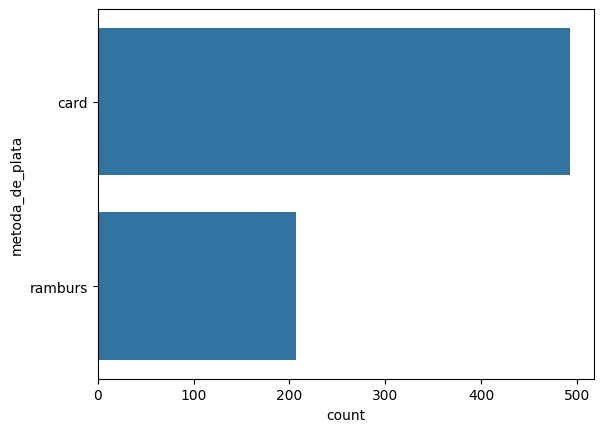

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("train.csv")
metoda_de_plata = df['metoda_de_plata']

# Afisez histograma pentru valoarea categorica "metoda_de_plata"
# Tip Countplot
sns.countplot(metoda_de_plata)
plt.show()

#### **3. c) 1.8 Foloseste cupoane de reducere? (valoare categorica)**

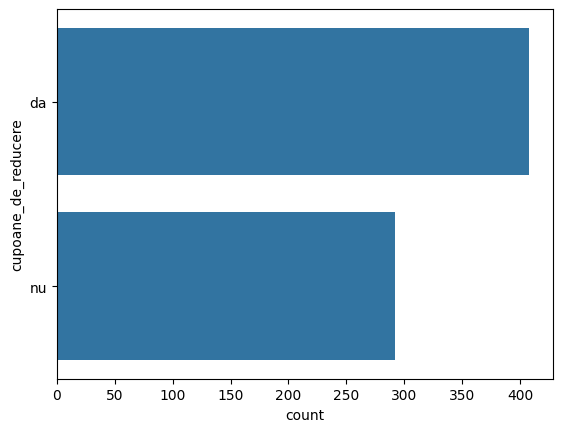

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("train.csv")
cupoane_de_reducere = df['cupoane_de_reducere']

# Afisez histograma pentru valoarea categorica "cupoane_de_reducere"
# Tip Countplot
sns.countplot(cupoane_de_reducere)
plt.show()

#### **3. c) 1.9 Cate recenzii acorda? (valoare numerica)**

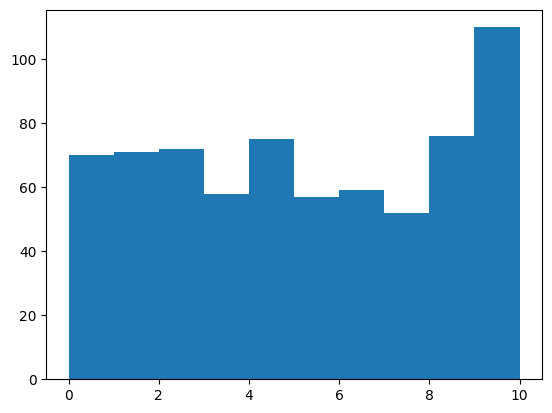

In [78]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("train.csv")
recenzii = df['recenzii']

# Afisez histograma pentru valoarea numerica "recenzii"
plt.hist(recenzii)
plt.show()

#### **3. c) 1.10 Ce tip de client este? (valoare categorica) -> *Coloana tinta***

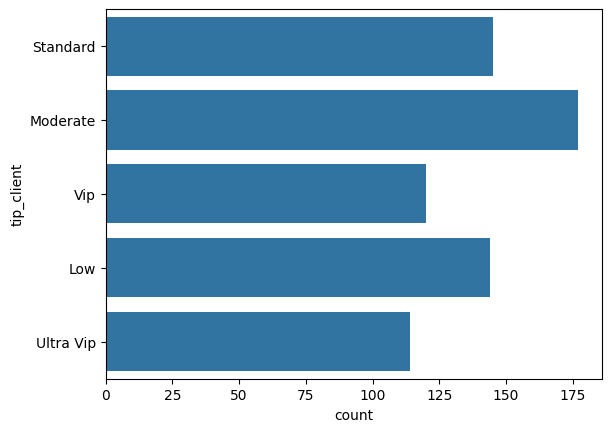

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("train.csv")
tip_client = df['tip_client']

# Afisez histograma pentru valoarea categorica "tip_client"
# Tip Countplot
sns.countplot(tip_client)
plt.show()

### **3. c) 2. test.csv**

#### **3. c) 2.1 Valoarea medie a unei comenzi (valoare numerica)**

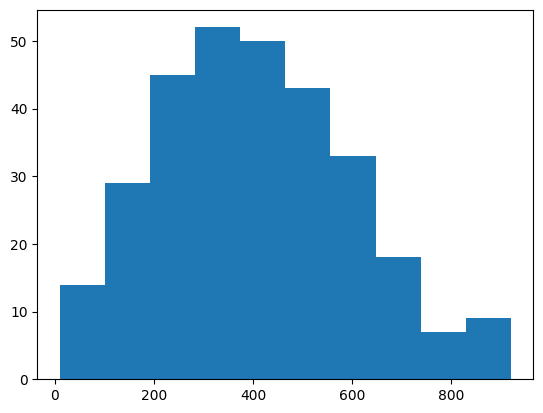

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("test.csv")
valoare_comanda_medie = df['valoare_comanda_medie']

# Afisez histograma pentru valoarea numerica "valoare_comanda_medie"
plt.hist(valoare_comanda_medie)
plt.show()

#### **3. c) 2.2 Foloseste aplicatia? (valoare categorica)**

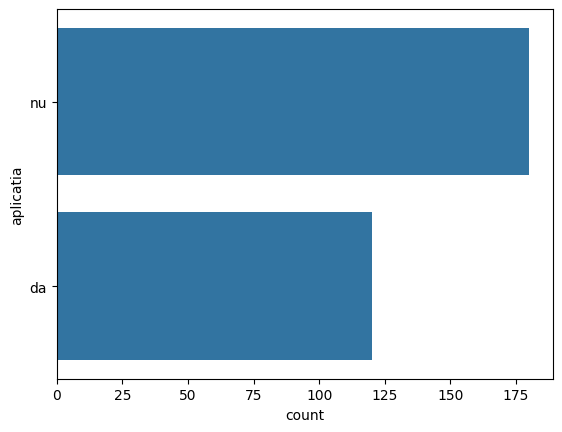

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("test.csv")
aplicatia = df['aplicatia']

# Afisez histograma pentru valoarea categorica "aplicatia"
# Tip Countplot
sns.countplot(aplicatia)
plt.show()


#### **3. c) 2.3 Ce dispozitiv foloseste? (valoare categorica)**

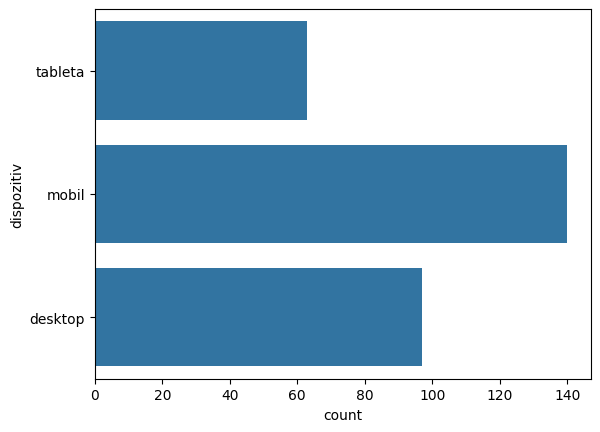

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("test.csv")
dispozitiv = df['dispozitiv']

# Afisez histograma pentru valoarea categorica "dispozitiv"
# Tip Countplot
sns.countplot(dispozitiv)
plt.show()

#### **3. c) 2.4 Cat timp petrece pe magazin? (valoare numerica)**

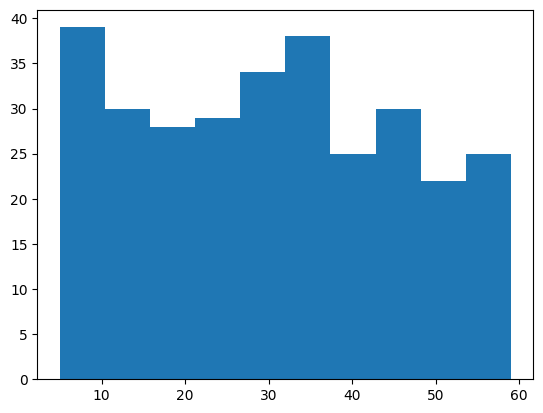

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("test.csv")
timp = df['timp']

# Afisez histograma pentru valoarea numerica "timp"
plt.hist(timp)
plt.show()

#### **3. c) 2.5 Frecventa lunara (valoare numerica)**

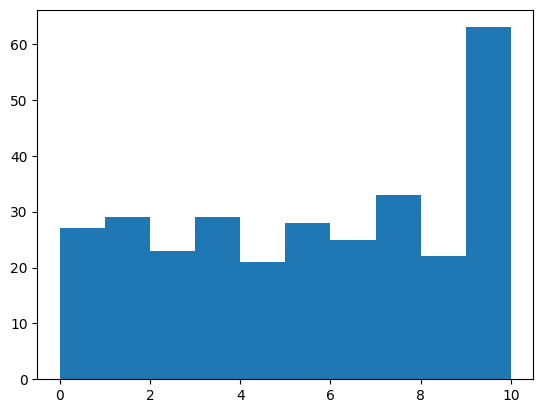

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("test.csv")
frecventa_lunara = df['frecventa_lunara']

# Afisez histograma pentru valoarea numerica "frecventa_lunara"
plt.hist(frecventa_lunara)
plt.show()

#### **3. c) 2.6 Varsta (valoare numerica)**

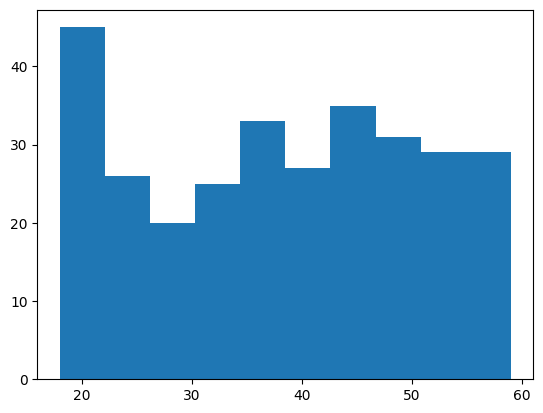

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("test.csv")
varsta = df['varsta']

# Afisez histograma pentru valoarea numerica "varsta"
plt.hist(varsta)
plt.show()

#### **3. c) 2.7 Metoda de plata (valoare categorica)**

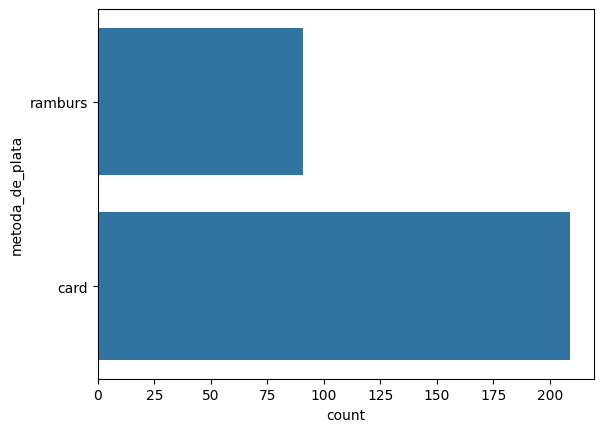

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("test.csv")
metoda_de_plata = df['metoda_de_plata']

# Afisez histograma pentru valoarea categorica "metoda_de_plata"
# Tip Countplot
sns.countplot(metoda_de_plata)
plt.show()

#### **3. c) 2.8 Foloseste cupoane de reducere? (valoare categorica)**

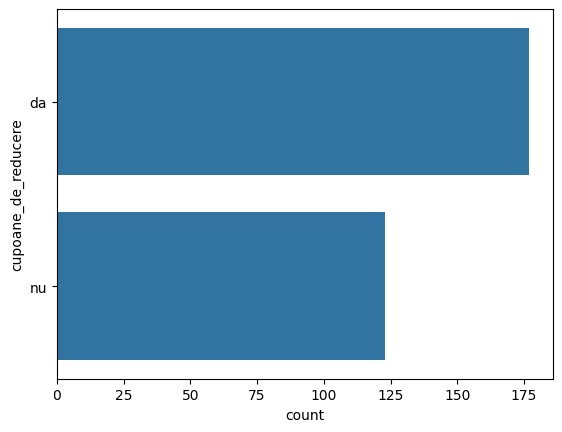

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("test.csv")
cupoane_de_reducere = df['cupoane_de_reducere']

# Afisez histograma pentru valoarea categorica "cupoane_de_reducere"
# Tip Countplot
sns.countplot(cupoane_de_reducere)
plt.show()

#### **3. c) 2.9 Cate recenzii acorda? (valoare numerica)**

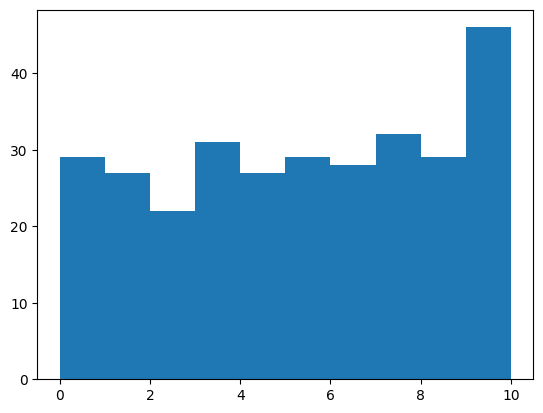

In [88]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("test.csv")
recenzii = df['recenzii']

# Afisez histograma pentru valoarea numerica "recenzii"
plt.hist(recenzii)
plt.show()

#### **3. c) 2.10 Ce tip de client este? (valoare categorica) -> *Coloana tinta***

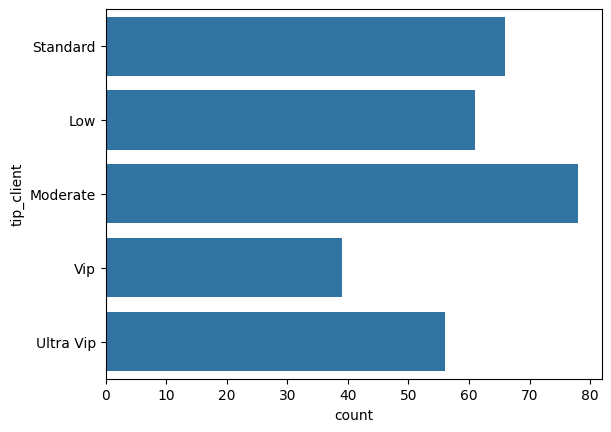

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("test.csv")
tip_client = df['tip_client']

# Afisez histograma pentru valoarea categorica "tip_client"
# Tip Countplot
sns.countplot(tip_client)
plt.show()

## **3. d) Detectarea outlierilor**

### **3. d) 1. train.csv**

#### **3. d) 1.1 Valoarea medie a unei comezi**

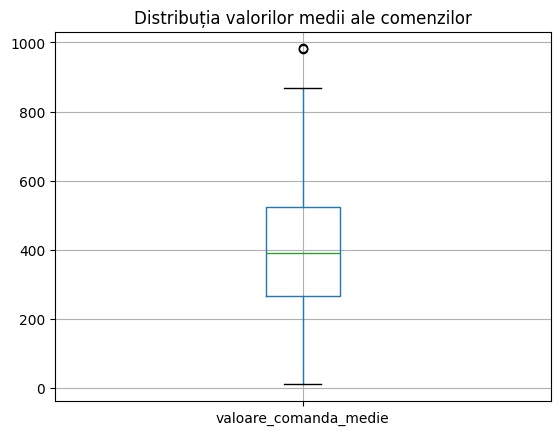

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("train.csv")
# Boxplot pentru valorile medii ale comenzilor
df.boxplot(column = "valoare_comanda_medie")
plt.title("Distribuția valorilor medii ale comenzilor")
plt.show()



#### **3. d) 1.2 Timpul petrecut pe magazin**

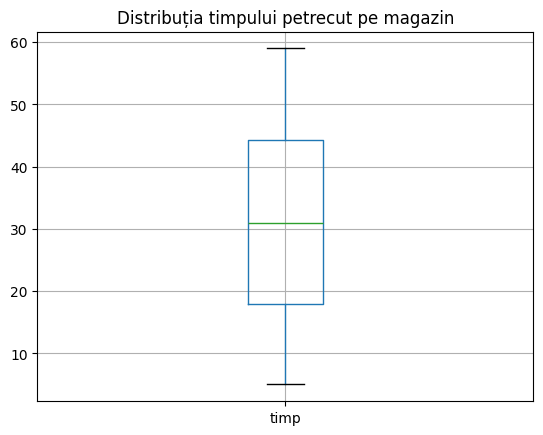

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("train.csv")
# Boxplot pentru timpul petrecut pe magazin
df.boxplot(column = "timp")
plt.title("Distribuția timpului petrecut pe magazin")
plt.show()



#### **3. d) 1.3 Frecventa lunara**

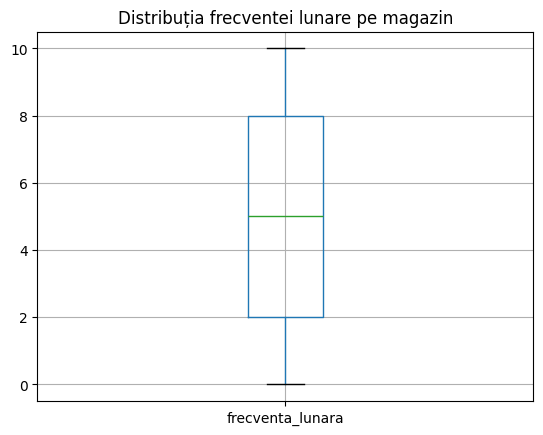

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("train.csv")
# Boxplot pentru frecventa lunara pe magazin
df.boxplot(column = "frecventa_lunara")
plt.title("Distribuția frecventei lunare pe magazin")
plt.show()



#### **3. d) 1.4 Varsta clientului**

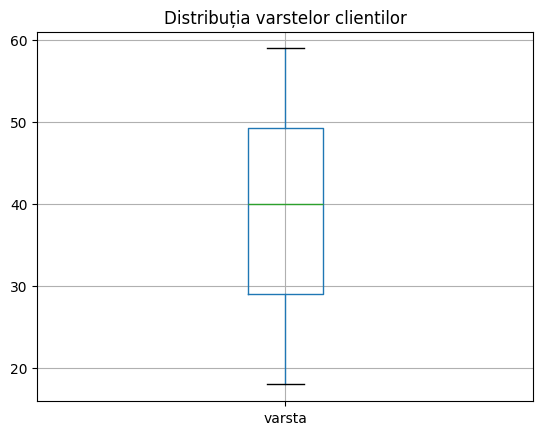

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("train.csv")
# Boxplot pentru varstele clientilor
df.boxplot(column = "varsta")
plt.title("Distribuția varstelor clientilor")
plt.show()



#### **3. d) 1.5 Recenzii**

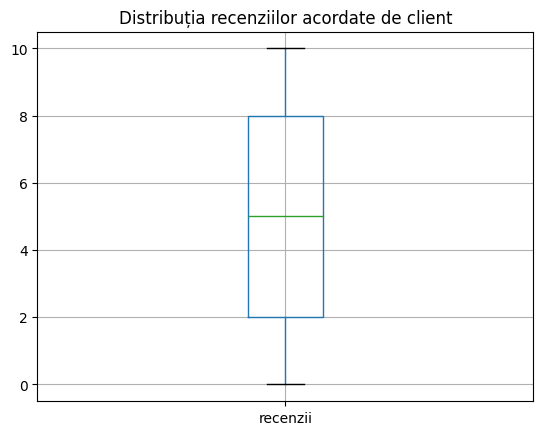

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("train.csv")
# Boxplot pentru recenzile acordate de client
df.boxplot(column = "recenzii")
plt.title("Distribuția recenziilor acordate de client")
plt.show()



### **3. d) 2. test.csv**

#### **3. d) 2.1 Valoarea medie a unei comezi**

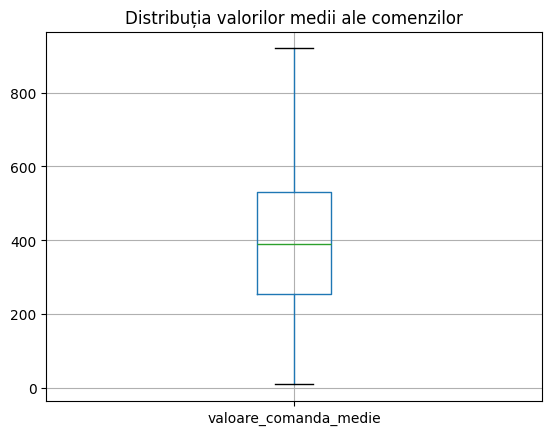

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("test.csv")
# Boxplot pentru valorile medii ale comenzilor
df.boxplot(column = "valoare_comanda_medie")
plt.title("Distribuția valorilor medii ale comenzilor")
plt.show()



#### **3. d) 2.2 Timpul petrecut pe magazin**

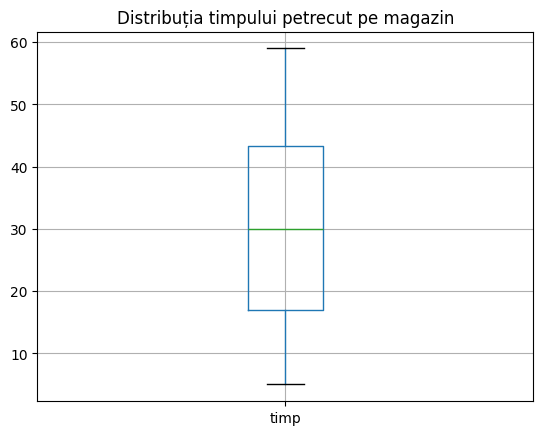

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("test.csv")
# Boxplot pentru timpul petrecut pe magazin
df.boxplot(column = "timp")
plt.title("Distribuția timpului petrecut pe magazin")
plt.show()



#### **3. d) 2.3 Frecventa lunara**

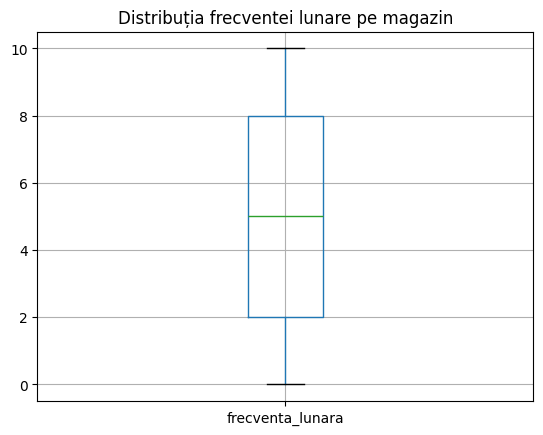

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("test.csv")
# Boxplot pentru frecventa lunara pe magazin
df.boxplot(column = "frecventa_lunara")
plt.title("Distribuția frecventei lunare pe magazin")
plt.show()



#### **3. d) 2.4 Varsta clientului**

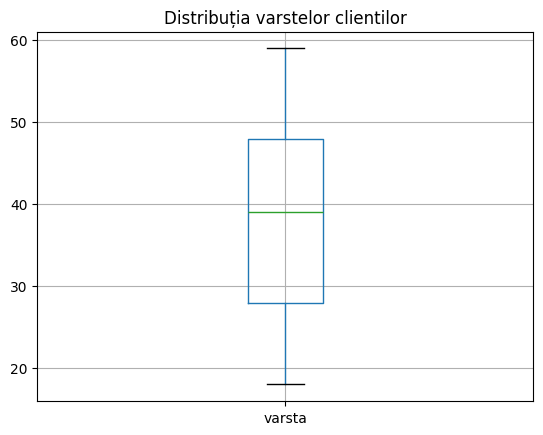

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("test.csv")
# Boxplot pentru varstele clientilor
df.boxplot(column = "varsta")
plt.title("Distribuția varstelor clientilor")
plt.show()



#### **3. d) 2.5 Recenzii**

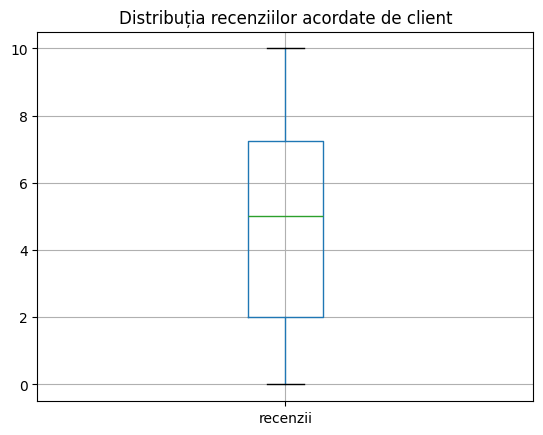

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("test.csv")
# Boxplot pentru recenzile acordate de client
df.boxplot(column = "recenzii")
plt.title("Distribuția recenziilor acordate de client")
plt.show()



## **3. e) Analiza corelatiilor**

#### **3. e) 1. train.csv**

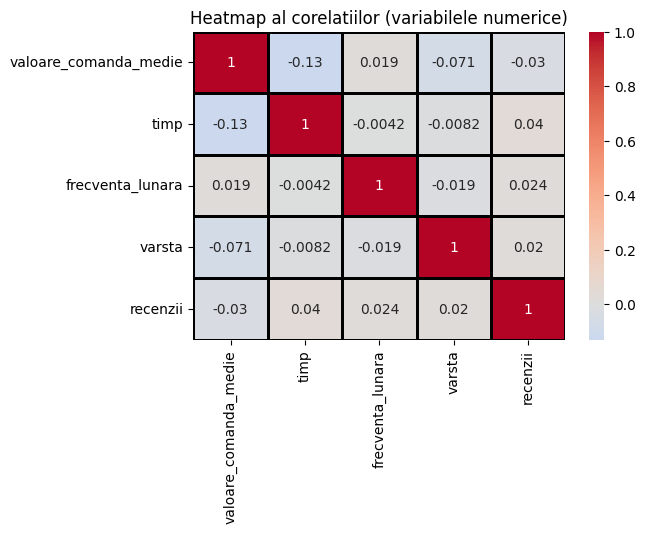

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

df_numeric = df.select_dtypes(include = ['number'])
corr = df_numeric.corr()

plt.figure(figsize = (6, 4))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', center = 0, linewidths = 1, linecolor = 'black')
plt.title('Heatmap al corelatiilor (variabilele numerice)')
plt.show()

### **3. e) 2. test.csv**

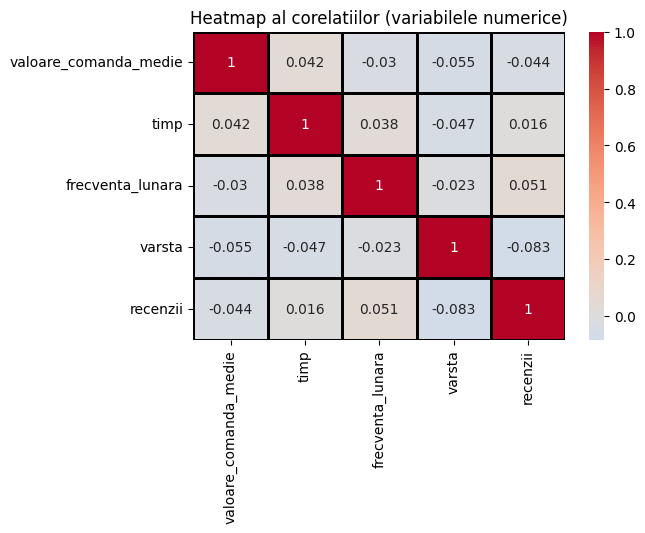

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("test.csv")

df_numeric = df.select_dtypes(include = ['number'])
corr = df_numeric.corr()

plt.figure(figsize = (6, 4))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', center = 0, linewidths = 1, linecolor = 'black')
plt.title('Heatmap al corelatiilor (variabilele numerice)')
plt.show()

## **3. f) Analiza relatiilor cu variabila tinta**

### **3. f) 1. train.csv**

#### **3. f) 1.1 valoare_comanda_medie <-> tip_client**

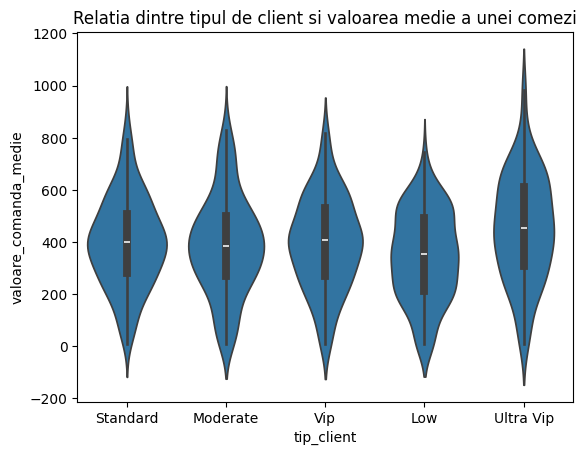

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'valoare_comanda_medie', data = df)
plt.title('Relatia dintre tipul de client si valoarea medie a unei comezi')
plt.show()


#### **3. f) 1.2 aplicatia <-> tip_client**

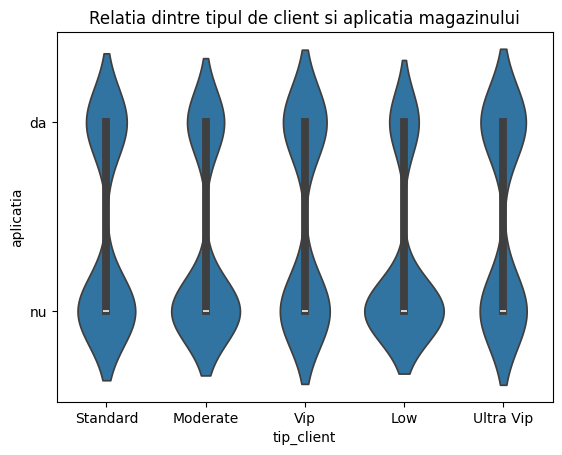

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'aplicatia', data = df)
plt.title('Relatia dintre tipul de client si aplicatia magazinului')
plt.show()


#### **3. f) 1.3 dispozitiv <-> tip_client**

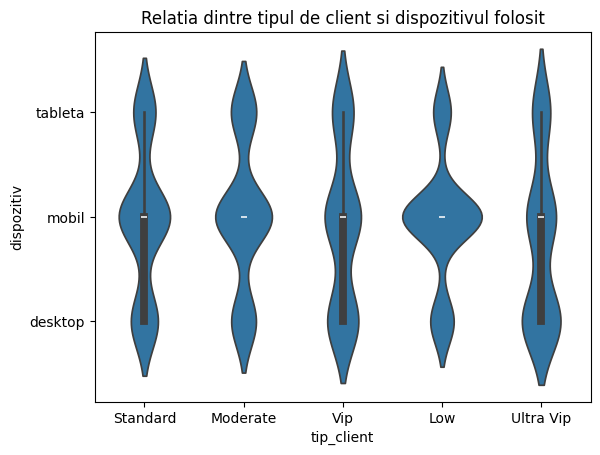

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'dispozitiv', data = df)
plt.title('Relatia dintre tipul de client si dispozitivul folosit')
plt.show()


#### **3. f) 1.4 timp <-> tip_client**

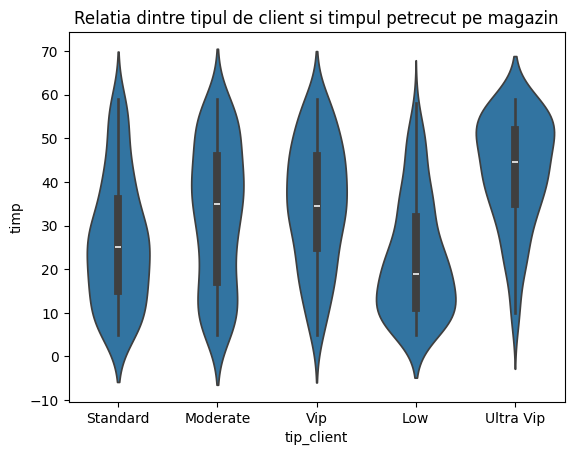

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'timp', data = df)
plt.title('Relatia dintre tipul de client si timpul petrecut pe magazin')
plt.show()


#### **3. f) 1.5 frecventa_lunara <-> tip_client**

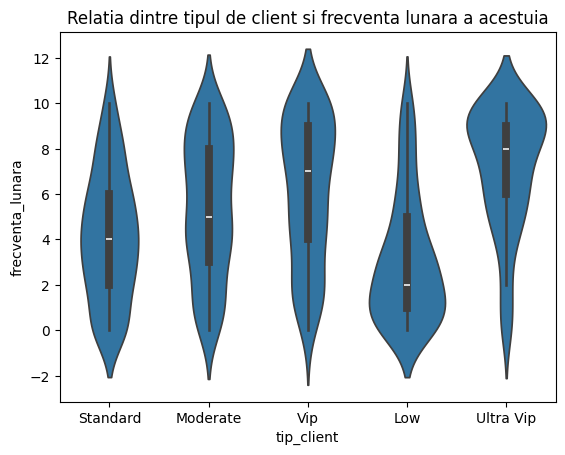

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'frecventa_lunara', data = df)
plt.title('Relatia dintre tipul de client si frecventa lunara a acestuia')
plt.show()


#### **3. f) 1.6 varsta <-> tip_client**

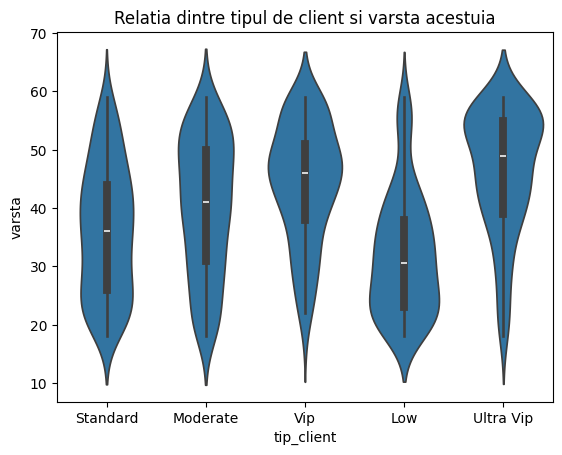

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'varsta', data = df)
plt.title('Relatia dintre tipul de client si varsta acestuia')
plt.show()


#### **3. f) 1.7 metoda_de_plata <-> tip_client**

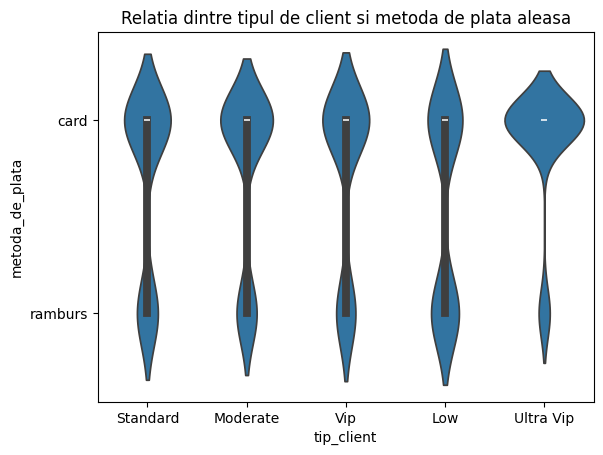

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'metoda_de_plata', data = df)
plt.title('Relatia dintre tipul de client si metoda de plata aleasa')
plt.show()


#### **3. f) 1.8 cupoane_de_reducere <-> tip_client**

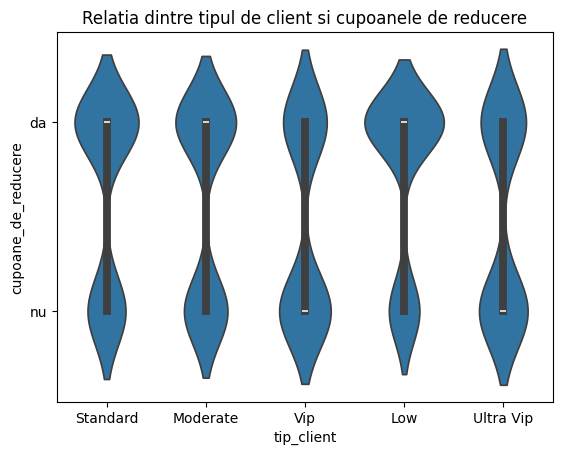

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'cupoane_de_reducere', data = df)
plt.title('Relatia dintre tipul de client si cupoanele de reducere')
plt.show()


#### **3. f) 1.9 recenzii <-> tip_client**

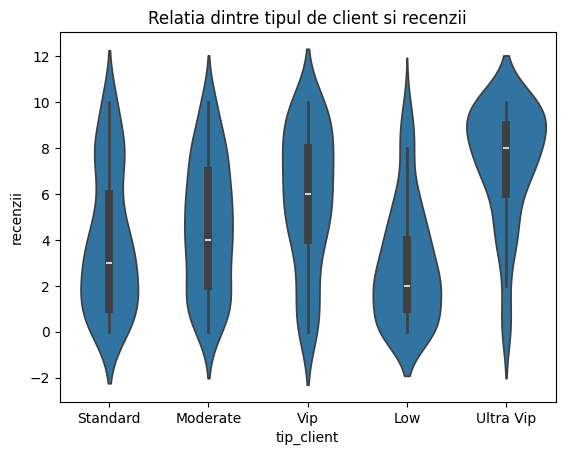

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'recenzii', data = df)
plt.title('Relatia dintre tipul de client si recenzii')
plt.show()


### **3. f) 2. test.csv**

#### **3. f) 2.1 valoare_comanda_medie <-> tip_client**

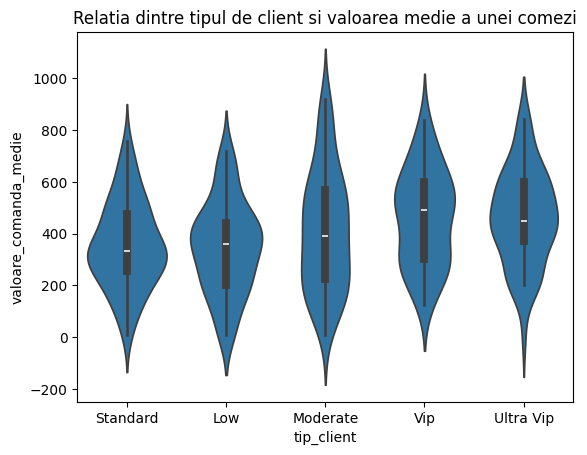

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("test.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'valoare_comanda_medie', data = df)
plt.title('Relatia dintre tipul de client si valoarea medie a unei comezi')
plt.show()


#### **3. f) 2.2 aplicatia <-> tip_client**

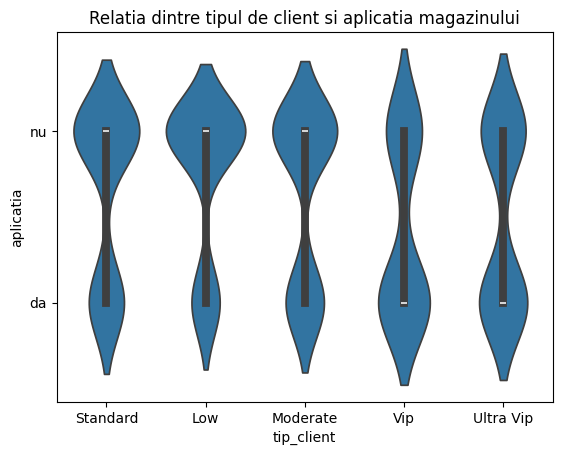

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("test.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'aplicatia', data = df)
plt.title('Relatia dintre tipul de client si aplicatia magazinului')
plt.show()


#### **3. f) 2.3 dispozitiv <-> tip_client**

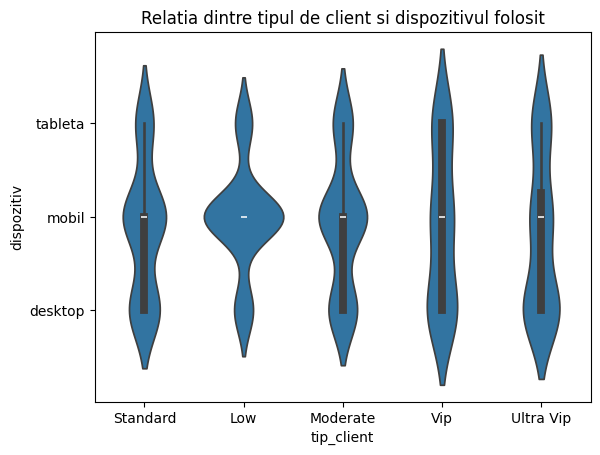

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("test.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'dispozitiv', data = df)
plt.title('Relatia dintre tipul de client si dispozitivul folosit')
plt.show()


#### **3. f) 2.4 timp <-> tip_client**

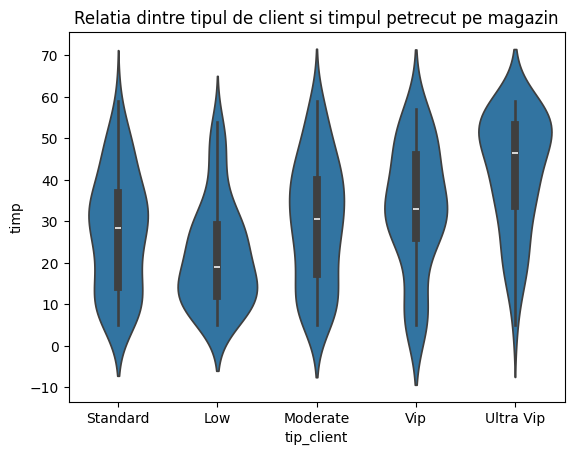

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("test.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'timp', data = df)
plt.title('Relatia dintre tipul de client si timpul petrecut pe magazin')
plt.show()


#### **3. f) 2.5 frecventa_lunara <-> tip_client**

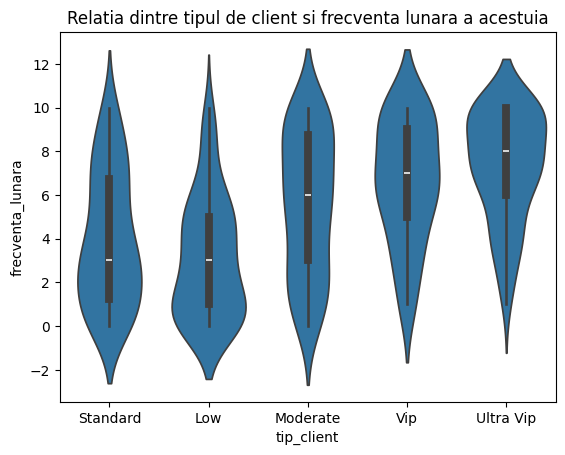

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("test.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'frecventa_lunara', data = df)
plt.title('Relatia dintre tipul de client si frecventa lunara a acestuia')
plt.show()


#### **3. f) 2.6 varsta <-> tip_client**

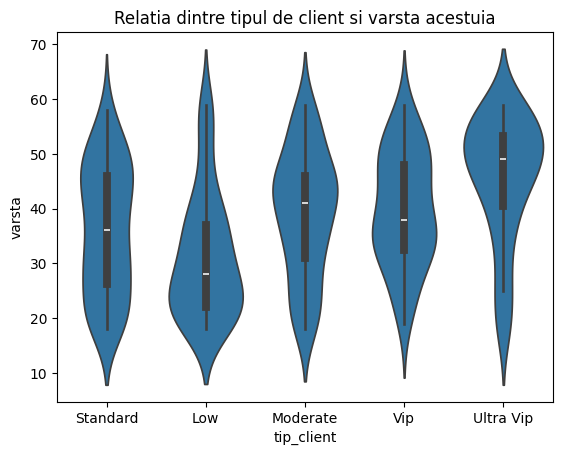

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("test.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'varsta', data = df)
plt.title('Relatia dintre tipul de client si varsta acestuia')
plt.show()


#### **3. f) 2.7 metoda_de_plata <-> tip_client**

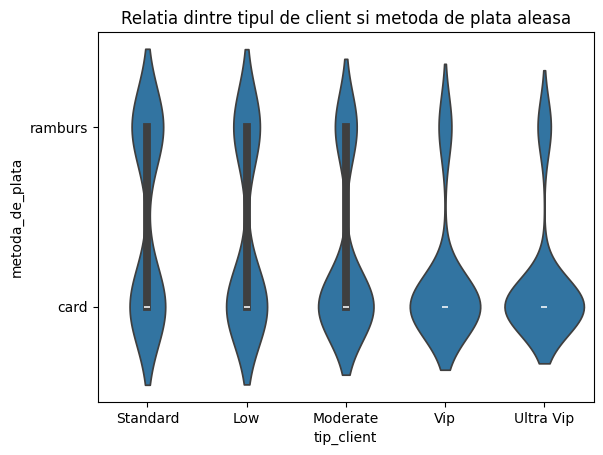

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("test.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'metoda_de_plata', data = df)
plt.title('Relatia dintre tipul de client si metoda de plata aleasa')
plt.show()


#### **3. f) 2.8 cupoane_de_reducere <-> tip_client**

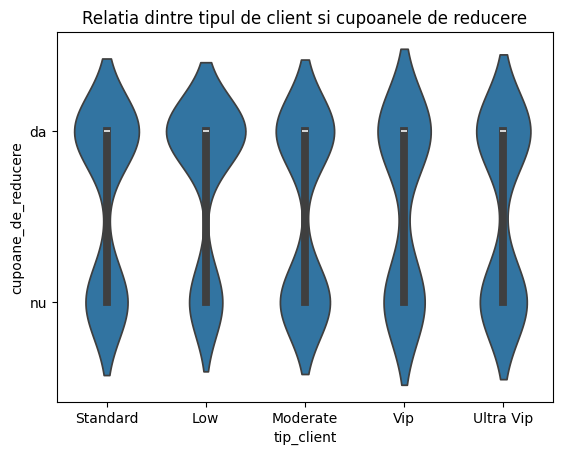

In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("test.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'cupoane_de_reducere', data = df)
plt.title('Relatia dintre tipul de client si cupoanele de reducere')
plt.show()


#### **3. f) 2.9 recenzii <-> tip_client**

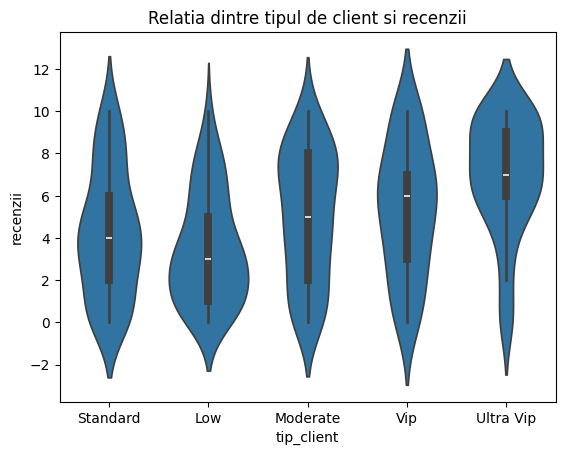

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("test.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'recenzii', data = df)
plt.title('Relatia dintre tipul de client si recenzii')
plt.show()


## **3. g) Comentarii si interpretari personale**

### Am realizat in README.pdf toate comentariiile!

# **4. Antrenare si evaluarea unui model de baza**

## **4. a) Encodarea sirurilor de caractere *(coloanele valorilor categorice)***

In [120]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# LabelEncoder
encoder = LabelEncoder()

coloane_categorice_Label = ["aplicatia", "cupoane_de_reducere"]

for coloana in coloane_categorice_Label:
    df_train[coloana] = encoder.fit_transform(df_train[coloana])
    df_test[coloana] = encoder.fit_transform(df_test[coloana])

# OneHotEncoder
coloane_categorice_OneHot = ["dispozitiv", "metoda_de_plata"]
df_train = pd.get_dummies(df_train, columns = ["dispozitiv", "metoda_de_plata"], drop_first = True)
df_test = pd.get_dummies(df_test, columns = ["dispozitiv", "metoda_de_plata"], drop_first = True)


## **4. b) Normalizarea si standardizarea variabilelor numerice ~ *Preprocesare***

In [121]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

colaone_numerice = ["valoare_comanda_medie", "timp", "frecventa_lunara", "varsta", "recenzii"]

# Normalizarea variabilelor numerice
scaler = MinMaxScaler()
df_train[colaone_numerice] = scaler.fit_transform(df_train[colaone_numerice])
df_test[colaone_numerice] = scaler.fit_transform(df_test[colaone_numerice])

# Standardizarea variabilelor numerice
scaler = StandardScaler()
df_train[colaone_numerice] = scaler.fit_transform(df_train[colaone_numerice])
df_test[colaone_numerice] = scaler.fit_transform(df_test[colaone_numerice])

# df_train


## **4. c) Impartirea datelor in antrenament si test**

In [122]:
X_train = df_train.drop(columns = "tip_client")
y_train = df_train["tip_client"]

X_test = df_test.drop(columns = "tip_client")
y_test = df_test["tip_client"]

X_train


,valoare_comanda_medie,aplicatia,timp,frecventa_lunara,varsta,cupoane_de_reducere,recenzii,dispozitiv_mobil,dispozitiv_tableta,metoda_de_plata_ramburs
0,0.976628,0,-1.404091,0.606261,-0.032829,0,-1.193106,False,True,False
1,0.422417,1,-0.265785,-0.020134,0.051040,0,-0.246554,True,False,False
2,-0.397992,1,0.619563,1.232656,-1.626338,1,0.068963,True,False,False
3,-1.924331,1,0.240128,-0.020134,0.218778,1,0.384480,False,False,True
4,1.277793,0,-0.139307,-0.646529,-0.116698,1,1.015515,False,False,False
...,...,...,...,...,...,...,...,...,...,...
695,-0.182565,1,-0.392264,-1.272924,0.973598,0,1.331032,False,False,False
696,-0.624840,0,0.240128,0.919458,-0.284435,1,-1.193106,True,False,False
697,-0.074364,0,0.429846,-0.020134,-1.458600,1,-1.193106,False,False,True
698,-0.994097,0,0.872520,-0.020134,1.392943,0,0.384480,False,False,False


## **4. d) Alegerea si antrenarea unui model**

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Creez modelul
model = LogisticRegression(max_iter = 1000, class_weight='balanced')

# Antrenez modelul pe subsetul de antrenare
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

## **4. e) Prezicerea rezultatelor**

In [124]:
# Prezic tipul clientului pentru datele de testare
y_pred = model.predict(X_test)

# Vad primele 10 predictii
print("Predictii:", y_pred[:15])
print("Adevarate:", y_test[:15])

Predictii: ['Low' 'Low' 'Moderate' 'Moderate' 'Moderate' 'Low' 'Ultra Vip' 'Low'
 'Moderate' 'Low' 'Moderate' 'Low' 'Moderate' 'Moderate' 'Standard']
Adevarate: 0      Standard
1           Low
2      Moderate
3           Vip
4      Moderate
5           Low
6     Ultra Vip
7           Low
8      Standard
9      Standard
10     Moderate
11          Low
12     Moderate
13     Moderate
14     Moderate
Name: tip_client, dtype: object


## **4. f) Evaluarea performantei modelului**

### **4. f) 1. Acuratetea, Precizia, Recall-ul, F1-Score**

In [125]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Acuratetea
acuratetea = accuracy_score(y_test, y_pred)
print(f"1. Acuratetea: {acuratetea:.2f}")

# Precizia
precizia = precision_score(y_test, y_pred, average = "weighted")
print(f"2. Precizia: {precizia:.2f}")

# Recall-ul
recall = recall_score(y_test, y_pred, average = "weighted")
print(f"3. Recall-ul: {recall:.2f}")

# F1-Score
formula1 = f1_score(y_test, y_pred, average = "weighted")
print(f"4. F1-Score: {formula1:.2f}")
print(classification_report(y_test, y_pred))

1. Acuratetea: 0.74
2. Precizia: 0.75
3. Recall-ul: 0.74
4. F1-Score: 0.74
              precision    recall  f1-score   support

         Low       0.83      0.87      0.85        61
    Moderate       0.75      0.62      0.68        78
    Standard       0.65      0.68      0.67        66
   Ultra Vip       0.94      0.82      0.88        56
         Vip       0.56      0.77      0.65        39

    accuracy                           0.74       300
   macro avg       0.74      0.75      0.74       300
weighted avg       0.75      0.74      0.74       300



### **4. f) 2. Matricea de confuzie**

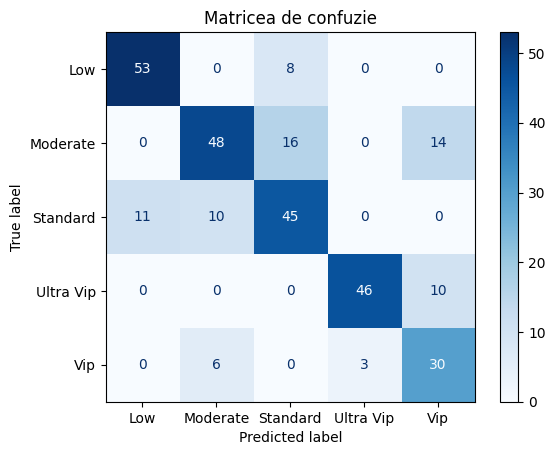

Clase în y_test:
 tip_client
Moderate     78
Standard     66
Low          61
Ultra Vip    56
Vip          39
Name: count, dtype: int64
Clase în y_pred:
 Standard     69
Low          64
Moderate     64
Vip          54
Ultra Vip    49
Name: count, dtype: int64


In [126]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Calculez matricea de confuzie

# Afisez matricea de confuzie
mat_confuzie = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = mat_confuzie, display_labels = model.classes_)
disp.plot(cmap = plt.cm.Blues)
plt.title("Matricea de confuzie")
plt.show()
print("Clase în y_test:\n", pd.Series(y_test).value_counts())
print("Clase în y_pred:\n", pd.Series(y_pred).value_counts())


### **4. f) 3. Grafice de erori**

#### **4. f) 3.1 Scatter plot**

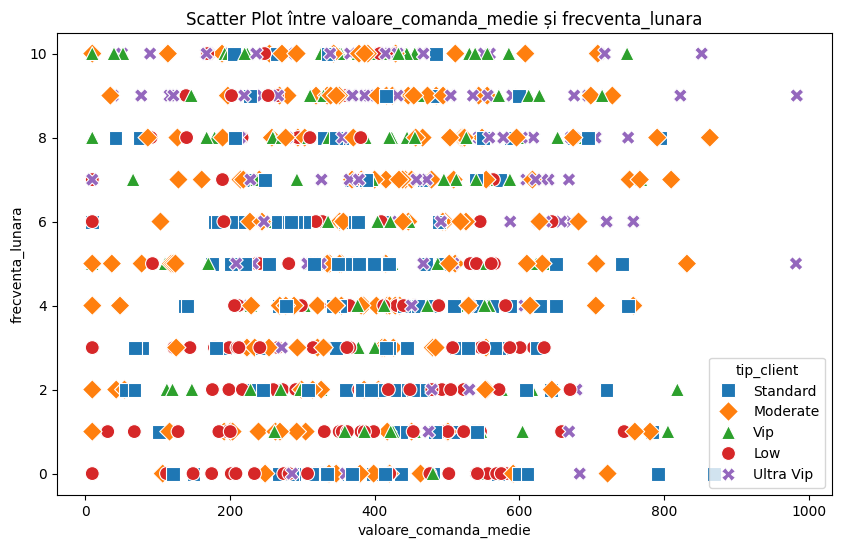

In [127]:
# Cele mai importante caracterisitici: "valoare_comanda_medie" si "frecventa_lunara"
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")
plt.figure(figsize=(10, 6))
markers = {'Low': 'o', 'Standard': 's', 'Moderate': 'D', 'Vip': '^', 'Ultra Vip': 'X'}

sns.scatterplot(data=df, x='valoare_comanda_medie', y='frecventa_lunara', hue='tip_client', style='tip_client', markers=markers, palette='tab10', s=100)

# Setăm titlul și etichetele axelor
plt.title("Scatter Plot între valoare_comanda_medie și frecventa_lunara")
plt.xlabel('valoare_comanda_medie')
plt.ylabel('frecventa_lunara')

# Afișăm legenda
plt.legend(title="tip_client", loc='best')

# Afișăm graficul
plt.show()



#### **4. f) 3.2 Pair plot**

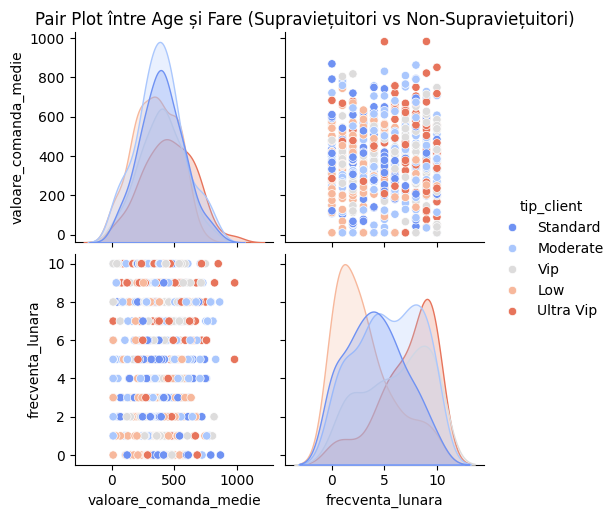

In [128]:
# Creăm un pairplot cu "valoare_comanda_medie" si "frecventa_lunara", colorat pe baza variabilei 'survived'
sns.pairplot(df[['valoare_comanda_medie', 'frecventa_lunara', 'tip_client']], hue='tip_client', palette='coolwarm')

# Setăm titlul graficului
plt.suptitle("Pair Plot între Age și Fare (Supraviețuitori vs Non-Supraviețuitori)", y=1.02)

# Afișăm graficul
plt.show()